In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import gzip

In [61]:
# Plotting gender stuff
df = pd.read_csv(gzip.open('data_cleaned/cleanedBigGun_age.csv.gz'))
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,sum n_killed&n_injured,latitude,longitude,...,participant_age_group,participant_gender,participant_name,participant_status,participant_type,# of Victims,# of Suspects,Avg Age of Victims,Avg Age of Suspects,year
0,854799,2014-01-01,Florida,Milton,NaN,0,0,0,30.6884,-87.0480,...,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Silvano Zaragoza-Ambriz||1::Kyle James Corbi,"0::Unharmed, Arrested||1::Unharmed, Arrested",0::Subject-Suspect||1::Subject-Suspect,0,2,NaN,31.0,2014
1,98134,2014-01-01,Louisiana,Marrero,6100 block of Ray St,1,0,1,29.8862,-90.1087,...,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Sgt. Joseph Anderson||1::Darwin Bethune,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,1,1,31.0,24.0,2014
2,92563,2014-01-01,Mississippi,Bogue Chitto,1347 Brumfield Rd SW,1,0,1,31.3762,-90.5601,...,0::Child 0-11||1::Teen 12-17,0::Female||1::Male,0::Karlianna Celeste Brumfield,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,1,1,6.0,13.0,2014
3,97976,2014-01-01,Hawaii,Lihue,NaN,1,0,1,21.9986,-159.3560,...,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Amby Cruz||1::Giovani Corpuz,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,1,1,88.0,41.0,2014
4,92117,2014-01-01,Kentucky,Cynthiana,NaN,0,1,1,38.4333,-84.3542,...,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Dustin Mullins||1::Timothy Turner,"0::Injured||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,1,1,NaN,NaN,2014


In [62]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'sum n_killed&n_injured', 'latitude', 'longitude',
       'n_guns_involved', 'STATE', 'gun_type', 'incident_characteristics',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_status', 'participant_type',
       '# of Victims', '# of Suspects', 'Avg Age of Victims',
       'Avg Age of Suspects', 'year'],
      dtype='object')

In [63]:
ageNational = df.groupby('year').mean()['Avg Age of Victims']
ageNational

year
2014    31.252284
2015    32.535835
2016    31.919309
2017    31.743507
2018    32.377778
Name: Avg Age of Victims, dtype: float64

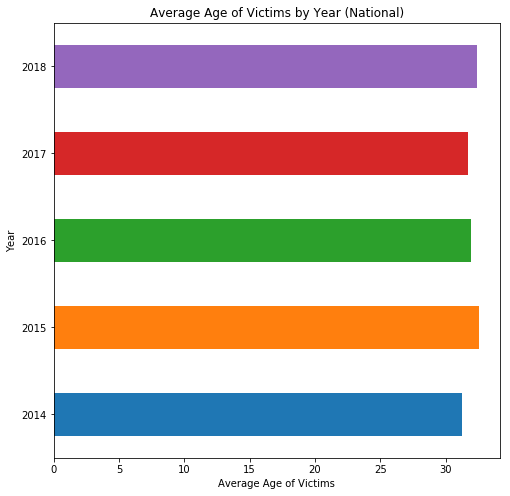

In [64]:
ageNational.plot(kind = 'barh', figsize = (8, 8))
plt.title('Average Age of Victims by Year (National)')
plt.xlabel('Average Age of Victims')
plt.ylabel('Year')
plt.show()

In [65]:
df['Avg Age of Victims'].unique()

array([ nan,  31.,   6.,  88.,  17.,  23.,  12.,  44.,  35.,  28.,  15.,
        37.,  26.,  21.,  18.,  24.,  50.,  20.,  66.,  19.,  46.,  14.,
        56.,  29.,  22.,  52.,   3.,  33.,  34.,  25.,  69.,  10.,  38.,
        30.,  40.,  68.,  39.,  76.,  59.,  27.,   4.,  77.,  55.,  16.,
        32.,  60.,  36.,  48.,  79.,  54.,  42.,  51.,  45.,  67.,  49.,
        62.,   5.,  13.,   1.,  47.,  41.,  63.,  43.,   9.,   2.,  71.,
         7.,  61.,  57.,   8.,  53.,  58.,  11.,  75.,  80.,  73.,  74.,
        72.,  83.,  65.,  81.,  64.,  70.,  90.,   0.,  84.,  91.,  78.,
        87.,  85.,  89.,  82.,  93.,  86.,  92.,  99., 100.])

In [66]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

age_bins = df['Avg Age of Victims'].groupby(pd.cut(df['Avg Age of Victims'], bins))

# < 5
# 5 - 9
# 10 - 14
# 15 - 19
# 20 - 24
# 25 - 29
# 30 - 34
# 35 - 39
# 40 - 44
# 45 - 49
# 50 - 54
# 55 - 59
# 60 - 64
# 65 - 69
# 70 - 74
# 75 - 79
# 80 - 84
# > 85

In [67]:
age_bins.count()

Avg Age of Victims
(0, 10]       551
(10, 20]     4957
(20, 30]     9036
(30, 40]     5582
(40, 50]     2931
(50, 60]     1844
(60, 70]      813
(70, 80]      348
(80, 90]      130
(90, 100]       9
Name: Avg Age of Victims, dtype: int64

In [68]:
age_bins.mean()

Avg Age of Victims
(0, 10]       5.480944
(10, 20]     17.570506
(20, 30]     25.155157
(30, 40]     35.013078
(40, 50]     45.078813
(50, 60]     54.990781
(60, 70]     65.001230
(70, 80]     74.698276
(80, 90]     84.338462
(90, 100]    93.555556
Name: Avg Age of Victims, dtype: float64

In [69]:
data = pd.DataFrame(df.groupby('year').mean()['Avg Age of Victims'])
data['Avg Age of Suspects'] = df.groupby('year').mean()['Avg Age of Suspects']
data = data.round(1)
data['Count of Suspects'] = df.groupby('year').count()['Avg Age of Suspects']
data['Count of Victims'] = df.groupby('year').count()['Avg Age of Victims']
data.reset_index(inplace = True)
#data['Avg Age of Suspects'] = df.groupby('year').mean()['Avg Age of Suspects']
data.rename(columns={"year": "Year"}, inplace = True)
data

,Year,Avg Age of Victims,Avg Age of Suspects,Count of Suspects,Count of Victims
0,2014,31.3,30.5,1909,1423
1,2015,32.5,31.3,8029,3544
2,2016,31.9,31.1,12796,7349
3,2017,31.7,31.3,17613,11513
4,2018,32.4,31.5,4139,2385


In [70]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models.widgets import DataTable, TableColumn
from bokeh.layouts import layout

# output to static HTML file
output_file('ageLineCharts.html')

hover1 = HoverTool(tooltips=[
    ("Year", "@Year"),
    ("Avg Age of Victims", "@{Avg Age of Victims}{0.f}")
   # ("Avg Age of Suspects", "@{Avg Age of Suspects}{0.f}"),
], mode = 'vline', names = ['hover1'])

hover2 = HoverTool(tooltips=[
    ("Year", "@Year"),
   # ("Avg Age of Victims", "@{Avg Age of Victims}{0.f}")
    ("Avg Age of Suspects", "@{Avg Age of Suspects}{0.f}"),
], mode = 'vline', names = ['hover2'])

# create a new plot with a title and axis labels
# x_range=[0,10], y_range=(10, 20)
TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,lasso_select"
p = figure(title = '2014 - 2018 Age Analysis by Year', x_axis_label='Year', y_axis_label='Average Age', plot_width=600, plot_height=600, tools = [TOOLS, hover1, hover2])
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5
p.outline_line_width = 7
p.outline_line_alpha = 0.3
p.outline_line_color = "navy"

# add a line renderer with legend and line thickness
p.circle('Year', 'Avg Age of Victims', legend = 'Age of Victims', source = ColumnDataSource(data), line_color = 'red', size = 10, fill_color='red')
p.circle('Year', 'Avg Age of Suspects', legend = 'Age of Suspects', source = ColumnDataSource(data), line_color = 'blue', size = 10)
p.line('Year', 'Avg Age of Victims', legend = 'Age of Victims', line_width=2, source = ColumnDataSource(data), line_color = 'red', name = 'hover1')
p.line('Year', 'Avg Age of Suspects', legend = 'Age of Suspects', line_width=2, source = ColumnDataSource(data), line_color = 'blue', name = 'hover2')

p.legend.location = "bottom_center"
p.legend.click_policy="hide"


source = ColumnDataSource(data)

columns = [
        TableColumn(field="Year", title="Year"),
        TableColumn(field="Avg Age of Victims", title="Avg Age of Victims"),
        TableColumn(field="Count of Victims", title="Count of Victims"),
        TableColumn(field="Avg Age of Suspects", title="Avg Age of Suspects"),
        TableColumn(field="Count of Suspects", title="Count of Suspects")
    ]
p_data = DataTable(source=source, columns=columns, width=600, height=600, selectable = True)

# show the results
show(layout([p, p_data]))

C:\Users\meifl\Anaconda3\lib\site-packages\bokeh\plotting\helpers.py:535: UserWarning: HoverTool are being repeated
  warnings.warn("%s are being repeated" % ",".join(repeated_tools))
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: year [renderer: GlyphRenderer(id='1fedacf5-bc78-430c-9acf-f0165c90117d', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: year [renderer: GlyphRenderer(id='225f3572-5eae-439a-8482-118bceb6e6ae', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: year [renderer: GlyphRenderer(id='d82a23f5-325c-4760-a64b-bbc87b635118', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: year [renderer: GlyphRenderer(id='e548771a-f112-4d4c-8748-421a98172096', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: year [renderer: GlyphRenderer(id='0b862a2e-50fc-4687-b87d-87704d078c8c', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: year [renderer: Gly